In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import seaborn as sns
import copy
from matplotlib import gridspec
import matplotlib.patches as patches
import matplotlib
%matplotlib inline
from matplotlib import gridspec
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager as font_manager
import pandas as pd
import matplotlib.font_manager as font_manager
import pandas as pd
font_dirs = ['/mnt/e/Misc/Python_Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.rcParams['font.family'] = 'arial'
import random
import scipy

In [2]:
rosette_sizes = pd.read_csv('/mnt/e/MPIMG/Elkabetz/scrna/d80_organoids/data/d80_rosette_vz_sizes.tsv',sep='\t')

In [3]:
rosette_sizes['Micrometer diameter'] = rosette_sizes['VZ Pixel diameter']/471*200

In [4]:
rosette_sizes['Micrometer Area'] = (rosette_sizes['Micrometer diameter']/2)**2*np.math.pi

In [5]:
rosette_sizes.to_csv('/mnt/e/MPIMG/Elkabetz/scrna/d80_organoids/data/d80_rosette_vz_sizes_with_mm.tsv',sep='\t')

In [6]:
rosette_sizes['Protocol'] = [x.split("_")[0] for x in rosette_sizes["Organoid"]]

In [7]:
#* Statistical tests for differences in the features across groups
from scipy import stats
all_t = list()
all_p = list()
all_p_levene = list()
all_p_bartlett = list()
for comp in [("SBN","SBNX")]:
    g1 = rosette_sizes[rosette_sizes['Protocol'] == comp[0]]['Micrometer Area'].values
    g2 = rosette_sizes[rosette_sizes['Protocol'] == comp[1]]['Micrometer Area'].values
    t, p = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)
    p_levene = stats.levene(g1, g2)[1]
    all_p_levene.append(p_levene)

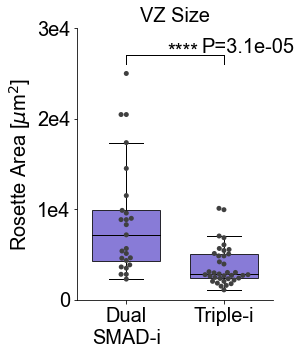

In [21]:
plt.figure(figsize=(3.5,5))

ax = sns.boxplot(x="Protocol", y='Micrometer Area', data=rosette_sizes,showfliers=False,color='white',
                linewidth=1,width=0.7)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='Micrometer Area', data=rosette_sizes, color=".25")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Rosette Area [$\mu$m$^2$]',fontsize=20)
plt.xlabel('')

y=27000
for j,idx in enumerate([[0,1]]):
    y_new = y+1000*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[0],idx[0]],[y_new-1000,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[1],idx[1]],[y_new-1000,y_new],'-',color='black',linewidth=1)
    plt.annotate('****',xy=(idx[0]+0.42*(idx[1]-idx[0]),y_new-300),fontsize=20)
    plt.annotate('P='+"{:.1e}".format(p),xy=(idx[0]+0.42*(idx[1]-idx[0])+0.35,y_new+300),fontsize=20)
    #plt.annotate('****',xy=(idx[0]+0.42*(idx[1]-idx[0]),y_new+3000),fontsize=20)
    #plt.annotate('P='+"{:.1e}".format(p_levene)+"\n$\it{Levene's}$"+" "+"$\it{test}$",
    #             xy=(idx[0]+0.42*(idx[1]-idx[0])+0.35,y_new+3000),fontsize=16)

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('slateblue')
    box.set_alpha(0.8)

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

plt.ylim(0,30000)
plt.xticks([0,1],['Dual\nSMAD-i','Triple-i'],fontsize=20)
plt.title('VZ Size',fontsize=20)
plt.yticks([0,10000,20000,30000],['0','1e4','2e4','3e4'],fontsize=20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig('figures/fig6/vesicle_area_comarison_merged.with_points.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/fig6vesicle_area_comarison_merged.with_points.pdf')

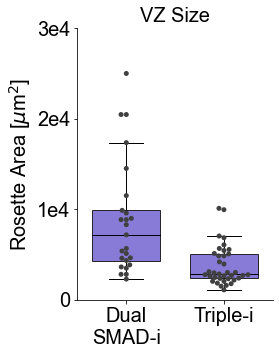

In [22]:
plt.figure(figsize=(3.5,5))

ax = sns.boxplot(x="Protocol", y='Micrometer Area', data=rosette_sizes,showfliers=False,color='white',
                linewidth=1,width=0.7)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='Micrometer Area', data=rosette_sizes, color=".25")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Rosette Area [$\mu$m$^2$]',fontsize=20)
plt.xlabel('')

'''
y=27000
for j,idx in enumerate([[0,1]]):
    y_new = y+1000*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[0],idx[0]],[y_new-1000,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[1],idx[1]],[y_new-1000,y_new],'-',color='black',linewidth=1)
    plt.annotate('****',xy=(idx[0]+0.42*(idx[1]-idx[0]),y_new-300),fontsize=20)
    plt.annotate('P='+"{:.1e}".format(p),xy=(idx[0]+0.42*(idx[1]-idx[0])+0.35,y_new+300),fontsize=20)
    #plt.annotate('****',xy=(idx[0]+0.42*(idx[1]-idx[0]),y_new+3000),fontsize=20)
    #plt.annotate('P='+"{:.1e}".format(p_levene)+"\n$\it{Levene's}$"+" "+"$\it{test}$",
    #             xy=(idx[0]+0.42*(idx[1]-idx[0])+0.35,y_new+3000),fontsize=16)
'''

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('slateblue')
    box.set_alpha(0.8)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

plt.ylim(0,30000)
plt.xticks([0,1],['Dual\nSMAD-i','Triple-i'],fontsize=20)
plt.title('VZ Size',fontsize=20)
plt.yticks([0,10000,20000,30000],['0','1e4','2e4','3e4'],fontsize=20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig('figures/fig6/vesicle_area_comarison_merged.with_points.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/fig6vesicle_area_comarison_merged.with_points.pdf')

In [23]:
rosette_sizes = pd.read_csv('/mnt/e/MPIMG/Elkabetz/scrna/d80_organoids/data/d80_sox2_in_osvz_round2.tsv',sep='\t')

In [24]:
rosette_sizes.tail(n=20)

,Experiment,Protocol,# Cortical unit,# SOX2 positive cells in VZ,# SOX2 positive cells in OSVZ,Cortical Unit Width,Cortical Unit Height,VZ pixel widths,VZ pixel heights,# SOX2 PTPRZ1 pos OSVZ,# SOX2 LIFR pos OSVZ
51,1,SBNX,31,127.0,65,520.0,353.0,316,224,14,14
52,1,SBNX,32,80.0,66,611.0,606.0,269,188,13,9
53,1,SBNX,33,37.0,103,684.0,519.0,171,130,32,3
54,1,SBNX,34,0.0,166,641.0,638.0,NaN,NaN,9,3
55,1,SBNX,35,0.0,146,801.0,715.0,NaN,NaN,26,10
56,2,SBN,1,NaN,137,992.8,713.1,"401, 341","240, 224",6,9
57,2,SBN,2,NaN,400,1704.0,969.1,"405, 408.5, 135","339, 306.5, 111.5",40,60
58,2,SBN,3,NaN,185,1189.6,898.5,"170.7, 130","128.3, 147.7",54,30
59,2,SBN,4,NaN,139,1188.0,942.0,"341, 186.2","286.3, 141.8",18,22
60,2,SBN,5,NaN,100,1037.0,1017.0,"145.5, 158.3","153.5, 139",25,17


Text(0.5, 1.0, 'SBNX r corr coeff = 0.9964027334299985\nSBN r corr coeff = 0.9962538031603788')

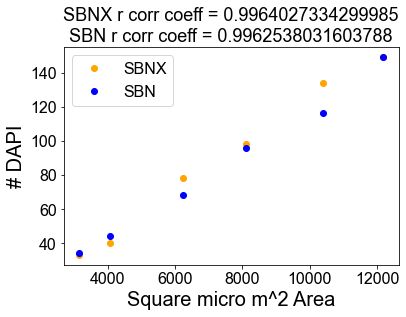

In [25]:
dapi_countings = pd.read_csv('/mnt/e/MPIMG/Elkabetz/scrna/d80_organoids/data/dapi_countings.tsv',sep='\t')

sbnx_x,sbnx_y = (dapi_countings[dapi_countings['Organoid']=='SBNX']['width pixels']/471*200)**2,dapi_countings[dapi_countings['Organoid']=='SBNX']['# DAPI']
sbn_x,sbn_y = (dapi_countings[dapi_countings['Organoid']=='SBN']['width pixels']/471*200)**2,dapi_countings[dapi_countings['Organoid']=='SBN']['# DAPI']

plt.plot(sbnx_x,sbnx_y,'o',color='orange',label='SBNX')
plt.plot(sbn_x,sbn_y,'o',color='blue',label='SBN')
plt.legend(fontsize=16)
plt.xlabel('Square micro m^2 Area',fontsize=20)
plt.ylabel('# DAPI',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

m_sbnx,b_sbnx,r_sbnx,p_sbnx,stderr_sbnx = scipy.stats.linregress(sbnx_x,sbnx_y)
m_sbn,b_sbn,r_sbn,p_sbn,stderr_sbn = scipy.stats.linregress(sbn_x,sbn_y)

plt.title('SBNX r corr coeff = '+str(r_sbnx)+'\nSBN r corr coeff = '+str(r_sbn),fontsize=18)

In [26]:
m_sbnx,b_sbnx,m_sbn,b_sbn

(0.013382969529335563,
 -9.73206206022499,
 0.012393138975751995,
 -6.6209666491882615)

In [27]:
rosette_sizes['Cortical Unit Height Micrometer'] = rosette_sizes['Cortical Unit Height']/471*200
rosette_sizes['Cortical Unit Width Micrometer'] = rosette_sizes['Cortical Unit Width']/471*200
rosette_sizes['Cortical Unit Area'] = np.math.pi*(rosette_sizes['Cortical Unit Width Micrometer']/2)*(rosette_sizes['Cortical Unit Height Micrometer']/2)

In [28]:
vz_areas = []
for widths,heights in zip(rosette_sizes['VZ pixel widths'],rosette_sizes['VZ pixel heights']):
    if str(widths) == 'nan': 
        vz_areas.append(0)
    else:
        area = 0
        for width,height in zip([float(x) for x in widths.split(",")],[float(x) for x in heights.split(",")]):
            area += np.math.pi*(width/471*200/2)*(height/471*200/2)
        vz_areas.append(area)
        
rosette_sizes['VZ Area'] = vz_areas

In [29]:
rosette_sizes['OSVZ Area'] = rosette_sizes['Cortical Unit Area']-rosette_sizes['VZ Area']

In [30]:
n_dapi = []
for protocol,osvz_area in zip(rosette_sizes['Protocol'],rosette_sizes['OSVZ Area']):
    if protocol == 'SBNX':
        n_dapi.append(m_sbnx*osvz_area+b_sbnx)
    else:
        n_dapi.append(m_sbn*osvz_area+b_sbn)

In [31]:
rosette_sizes['# DAPI in OSVZ'] = n_dapi

In [32]:
rosette_sizes['# DAPI rounded in OSVZ'] = [round(x) for x in n_dapi]

In [33]:
rosette_sizes.tail(n=10)

,Experiment,Protocol,# Cortical unit,# SOX2 positive cells in VZ,# SOX2 positive cells in OSVZ,Cortical Unit Width,Cortical Unit Height,VZ pixel widths,VZ pixel heights,# SOX2 PTPRZ1 pos OSVZ,# SOX2 LIFR pos OSVZ,Cortical Unit Height Micrometer,Cortical Unit Width Micrometer,Cortical Unit Area,VZ Area,OSVZ Area,# DAPI in OSVZ,# DAPI rounded in OSVZ
61,2,SBN,6,NaN,189,1276.6,1028.3,"189,180","174, 160",31,40,436.645435,542.080679,185901.431647,8735.638788,177165.792860,2189.019326,2189
62,2,SBNX,1,NaN,175,1347.0,948.0,189,119,69,38,402.547771,571.974522,180835.625000,3185.054177,177650.570823,2367.760114,2368
63,2,SBNX,2,NaN,152,1220.0,886.0,355.1,365,54,60,376.220807,518.046709,153074.063456,18354.881930,134719.181526,1793.210639,1793
64,2,SBNX,3,NaN,106,1247.3,786.0,267,195,50,30,333.757962,529.639066,138835.819088,7373.164632,131462.654456,1749.628637,1750
65,2,SBNX,4,NaN,328,1849.0,1421.0,"346, 170","332, 190.2",130,123,603.397028,785.138004,372082.331230,20846.520173,351235.811057,4690.846095,4691
66,2,SBNX,5,NaN,112,2860.0,1728.0,NaN,NaN,47,15,733.757962,1214.437367,699870.728200,0.000000,699870.728200,9356.616568,9357
67,2,SBNX,6,NaN,183,1368.0,1356.4,150,105,25,5,575.966030,580.891720,262773.724634,2230.430096,260543.294538,3477.110910,3477
68,2,SBNX,7,NaN,132,1647.0,1026.0,204,193,68,38,435.668790,699.363057,239303.482272,5575.650396,233727.831876,3118.240390,3118
69,2,SBNX,8,NaN,62,1087.0,638.0,NaN,NaN,15,13,270.912951,461.571125,98210.581219,0.000000,98210.581219,1304.617154,1305
70,2,SBNX,9,NaN,187,1316.4,854.0,328,293,69,57,362.632696,558.980892,159203.936787,13609.730410,145594.206378,1938.750766,1939


In [34]:
rosette_sizes.to_csv('/mnt/e/MPIMG/Elkabetz/scrna/d80_organoids/data/sox2_osvz_with_dapi.tsv',sep='\t')

In [35]:
rosette_sizes['# SOX2 per OSVZ Area'] =  rosette_sizes['# SOX2 positive cells in OSVZ']/(rosette_sizes['Cortical Unit Area']-rosette_sizes['VZ Area'])

In [36]:
rosette_sizes['# SOX2 per OSVZ DAPI'] =  rosette_sizes['# SOX2 positive cells in OSVZ']/rosette_sizes['# DAPI in OSVZ']

In [37]:
#* Statistical tests for differences in the features across groups
from scipy import stats
all_t = list()
all_p = list()
all_p_levene = list()
for comp in [("SBN","SBNX")]:
    g1 = rosette_sizes[rosette_sizes['Protocol'] == comp[0]]['# SOX2 per OSVZ DAPI'].values
    g2 = rosette_sizes[rosette_sizes['Protocol'] == comp[1]]['# SOX2 per OSVZ DAPI'].values
    t, p = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

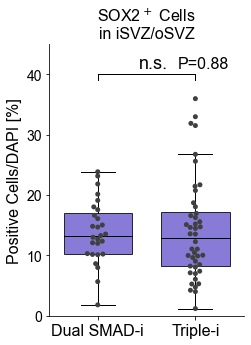

In [46]:
plt.figure(figsize=(3.5,5))

ax = sns.boxplot(x="Protocol", y='# SOX2 per OSVZ DAPI', data=rosette_sizes,showfliers=False,color='white',
                linewidth=1,width=0.7)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='# SOX2 per OSVZ DAPI', data=rosette_sizes, color=".25")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('Positive Cells/DAPI [%]',fontsize=16)
plt.xlabel('')

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('slateblue')
    box.set_alpha(0.8)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

y=0.4
for j,idx in enumerate([[0,1]]):
    y_new = y+1.5e-8*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[0],idx[0]],[y_new-0.01,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[1],idx[1]],[y_new-0.01,y_new],'-',color='black',linewidth=1)
    plt.annotate('n.s.',xy=(idx[0]+0.42*(idx[1]-idx[0]),y_new+0.01),fontsize=18)
    plt.annotate('P='+str(round(p,2)),xy=(idx[0]+0.42*(idx[1]-idx[0])+0.4,y_new+0.01),fontsize=16)

plt.ylim(0,0.45)
#plt.ylim(0,30000)
plt.xticks([0,1],['Dual SMAD-i','Triple-i'],fontsize=16)
plt.yticks([0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4],fontsize=14)
plt.title('SOX2$^+$ Cells\nin iSVZ/oSVZ',fontsize=16)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.show()
plt.yticks(plt.yticks()[0],[str(int(x*100)) for x in plt.yticks()[0]])
plt.savefig('figures/fig6/n_sox2_per_osvz_area_dapi.with_points.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/fig6/n_sox2_per_osvz_area_dapi.with_points.pdf')

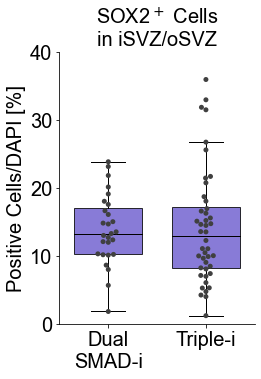

In [47]:
plt.figure(figsize=(3.5,5))

ax = sns.boxplot(x="Protocol", y='# SOX2 per OSVZ DAPI', data=rosette_sizes,showfliers=False,color='white',
                linewidth=1,width=0.7)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='# SOX2 per OSVZ DAPI', data=rosette_sizes, color=".25")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Positive Cells/DAPI [%]',fontsize=20)
plt.xlabel('')

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('slateblue')
    box.set_alpha(0.8)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

'''
y=0.4
for j,idx in enumerate([[0,1]]):
    y_new = y+1.5e-8*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[0],idx[0]],[y_new-0.01,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[1],idx[1]],[y_new-0.01,y_new],'-',color='black',linewidth=1)
    plt.annotate('n.s.',xy=(idx[0]+0.42*(idx[1]-idx[0]),y_new+0.01),fontsize=20)
    plt.annotate('P='+str(round(p,2)),xy=(idx[0]+0.42*(idx[1]-idx[0])+0.4,y_new+0.01),fontsize=20)
'''

plt.ylim(0,0.45)
#plt.ylim(0,30000)
plt.xticks([0,1],['Dual\nSMAD-i','Triple-i'],fontsize=20)
plt.yticks([0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4],fontsize=20)
plt.title('SOX2$^+$ Cells\nin iSVZ/oSVZ',fontsize=20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.show()
plt.ylim(0,0.4)
plt.yticks(plt.yticks()[0],[str(int(x*100)) for x in plt.yticks()[0]],fontsize=20)
plt.savefig('figures/fig6/n_sox2_per_osvz_area_dapi.with_points.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/fig6/n_sox2_per_osvz_area_dapi.with_points.pdf')

In [48]:
rosette_sizes['# SOX2 ptprz1 pos per sox2 pos'] =  rosette_sizes['# SOX2 PTPRZ1 pos OSVZ']/rosette_sizes['# SOX2 positive cells in OSVZ']

In [49]:
#* Statistical tests for differences in the features across groups
from scipy import stats
all_t = list()
all_p = list()
all_p_levene = list()
for comp in [("SBN","SBNX")]:
    g1 = rosette_sizes[rosette_sizes['Protocol'] == comp[0]]['# SOX2 ptprz1 pos per sox2 pos'].values
    g2 = rosette_sizes[rosette_sizes['Protocol'] == comp[1]]['# SOX2 ptprz1 pos per sox2 pos'].values
    t, p = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

In [50]:
all_p

[2.277804362662304e-06]

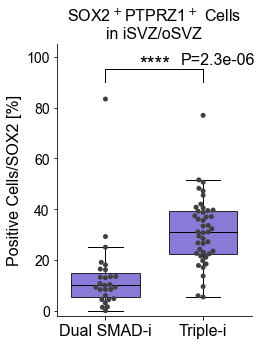

In [51]:
plt.figure(figsize=(3.5,5))

ax = sns.boxplot(x="Protocol", y='# SOX2 ptprz1 pos per sox2 pos', data=rosette_sizes,showfliers=False,color='white',
                linewidth=1,width=0.7)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='# SOX2 ptprz1 pos per sox2 pos', data=rosette_sizes, color=".25")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('Positive Cells/SOX2 [%]',fontsize=16)
plt.xlabel('')

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('slateblue')
    box.set_alpha(0.8)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

y=0.95
for j,idx in enumerate([[0,1]]):
    y_new = y+1.5e-8*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[0],idx[0]],[y_new-0.05,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[1],idx[1]],[y_new-0.05,y_new],'-',color='black',linewidth=1)
    plt.annotate('****',xy=(idx[0]+0.35*(idx[1]-idx[0]),y_new),fontsize=20)
    plt.annotate('P='+"{:.1e}".format(p),xy=(idx[0]+0.42*(idx[1]-idx[0])+0.35,y_new+0.02),fontsize=16)

plt.ylim(-0.02,1.05)
#plt.ylim(0,30000)
plt.xticks([0,1],['Dual SMAD-i','Triple-i'],fontsize=16)
plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','0.2','0.4','0.6','0.8','1'],fontsize=14)
plt.title('SOX2$^+$PTPRZ1$^+$ Cells\nin iSVZ/oSVZ',fontsize=16)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.show()
plt.yticks(plt.yticks()[0],[str(int(x*100)) for x in plt.yticks()[0]])
plt.savefig('figures/fig6/n_sox2_ptprz1_per_sox2_pos_osvz_area.with_points.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/fig6/n_sox2_ptprz1_per_sox2_pos_osvz_area.with_points.pdf')

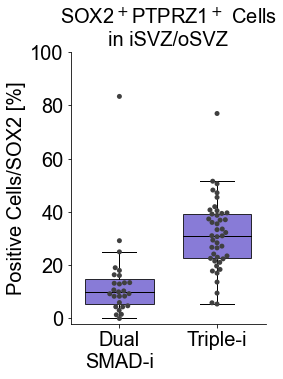

In [63]:
plt.figure(figsize=(3.5,5))

ax = sns.boxplot(x="Protocol", y='# SOX2 ptprz1 pos per sox2 pos', data=rosette_sizes,showfliers=False,color='white',
                linewidth=1,width=0.7)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='# SOX2 ptprz1 pos per sox2 pos', data=rosette_sizes, color=".25")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Positive Cells/SOX2 [%]',fontsize=20)
plt.xlabel('')

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('slateblue')
    box.set_alpha(0.8)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

'''
y=0.95
for j,idx in enumerate([[0,1]]):
    y_new = y+1.5e-8*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[0],idx[0]],[y_new-0.05,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[1],idx[1]],[y_new-0.05,y_new],'-',color='black',linewidth=1)
    plt.annotate('****',xy=(idx[0]+0.35*(idx[1]-idx[0]),y_new),fontsize=20)
    plt.annotate('P='+"{:.1e}".format(p),xy=(idx[0]+0.42*(idx[1]-idx[0])+0.35,y_new+0.02),fontsize=16)
'''

#plt.ylim(0,30000)
plt.xticks([0,1],['Dual\nSMAD-i','Triple-i'],fontsize=20)
plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','0.2','0.4','0.6','0.8','1'],fontsize=20)
plt.title('SOX2$^+$PTPRZ1$^+$ Cells\nin iSVZ/oSVZ',fontsize=20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.show()
plt.ylim(-0.02,1)
plt.yticks(plt.yticks()[0],[str(int(x*100)) for x in plt.yticks()[0]],fontsize=20)
plt.savefig('figures/fig6/n_sox2_ptprz1_per_sox2_pos_osvz_area.with_points.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/fig6/n_sox2_ptprz1_per_sox2_pos_osvz_area.with_points.pdf')

In [64]:
rosette_sizes['# SOX2 lifr pos per sox2 pos'] =  rosette_sizes['# SOX2 LIFR pos OSVZ']/rosette_sizes['# SOX2 positive cells in OSVZ']

In [65]:
#* Statistical tests for differences in the features across groups
from scipy import stats
all_t = list()
all_p = list()
all_p_levene = list()
for comp in [("SBN","SBNX")]:
    g1 = rosette_sizes[rosette_sizes['Protocol'] == comp[0]]['# SOX2 lifr pos per sox2 pos'].values
    g2 = rosette_sizes[rosette_sizes['Protocol'] == comp[1]]['# SOX2 lifr pos per sox2 pos'].values
    t, p = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)
    all_p_levene.append(stats.levene(g1, g2)[1])

In [66]:
all_p

[2.8154738869489197e-05]

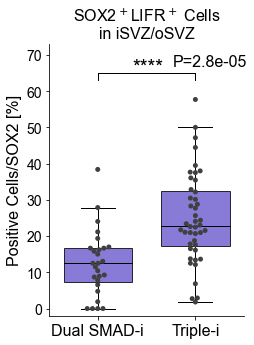

In [67]:
plt.figure(figsize=(3.5,5))

ax = sns.boxplot(x="Protocol", y='# SOX2 lifr pos per sox2 pos', data=rosette_sizes,showfliers=False,color='white',
                linewidth=1,width=0.7)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='# SOX2 lifr pos per sox2 pos', data=rosette_sizes, color=".25")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('Positive Cells/SOX2 [%]',fontsize=16)
plt.xlabel('')

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('slateblue')
    box.set_alpha(0.8)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')

y=0.65
for j,idx in enumerate([[0,1]]):
    y_new = y+1.5e-8*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[0],idx[0]],[y_new-0.02,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[1],idx[1]],[y_new-0.02,y_new],'-',color='black',linewidth=1)
    plt.annotate('****',xy=(idx[0]+0.35*(idx[1]-idx[0]),y_new),fontsize=20)
    plt.annotate('P='+"{:.1e}".format(p),xy=(idx[0]+0.42*(idx[1]-idx[0])+0.35,y_new+0.02),fontsize=16)

plt.ylim(-0.02,0.73)
#plt.ylim(0,30000)
plt.xticks([0,1],['Dual SMAD-i','Triple-i'],fontsize=16)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=14)
plt.title('SOX2$^+$LIFR$^+$ Cells\nin iSVZ/oSVZ',fontsize=16)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.show()
plt.yticks(plt.yticks()[0],[str(int(x*100)) for x in plt.yticks()[0]])
plt.savefig('figures/fig6/n_sox2_lifr_per_sox2_pos_osvz_area.with_points.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/fig6/n_sox2_lifr_per_sox2_pos_osvz_area.with_points.pdf')

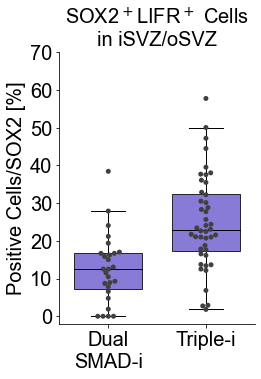

In [70]:
plt.figure(figsize=(3.5,5))

ax = sns.boxplot(x="Protocol", y='# SOX2 lifr pos per sox2 pos', data=rosette_sizes,showfliers=False,color='white',
                linewidth=1,width=0.7)#,linecolor='black')
ax = sns.swarmplot(x="Protocol", y='# SOX2 lifr pos per sox2 pos', data=rosette_sizes, color=".25")
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel('Positive Cells/SOX2 [%]',fontsize=20)
plt.xlabel('')

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('slateblue')
    box.set_alpha(0.8)

    # iterate over whiskers and median lines
    for j in range(5*i,5*(i+1)):
         ax.lines[j].set_color('black')


'''
y=0.65
for j,idx in enumerate([[0,1]]):
    y_new = y+1.5e-8*j
    plt.plot([idx[0],idx[1]],[y_new,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[0],idx[0]],[y_new-0.02,y_new],'-',color='black',linewidth=1)
    plt.plot([idx[1],idx[1]],[y_new-0.02,y_new],'-',color='black',linewidth=1)
    plt.annotate('****',xy=(idx[0]+0.35*(idx[1]-idx[0]),y_new),fontsize=20)
    plt.annotate('P='+"{:.1e}".format(p),xy=(idx[0]+0.42*(idx[1]-idx[0])+0.35,y_new+0.02),fontsize=20)
'''

plt.ylim(-0.02,0.7)
#plt.ylim(0,30000)
plt.xticks([0,1],['Dual\nSMAD-i','Triple-i'],fontsize=20)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=20)
plt.title('SOX2$^+$LIFR$^+$ Cells\nin iSVZ/oSVZ',fontsize=20)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.show()
plt.yticks(plt.yticks()[0],[str(int(x*100)) for x in plt.yticks()[0]],fontsize=20)
plt.savefig('figures/fig6/n_sox2_lifr_per_sox2_pos_osvz_area.with_points.png',dpi=500,bbox_inches='tight')
plt.savefig('figures/fig6/n_sox2_lifr_per_sox2_pos_osvz_area.with_points.pdf')

In [33]:
rosette_sizes.to_csv('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Revision/day_80_countings_oRG_countings.tsv',sep='\t',index=False)